In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import os
from tqdm import tqdm

sc.set_figure_params(figsize=(6, 4))

In [2]:
adata = sc.read('data/integrated.h5ad')

/home/badi/anaconda3/envs/ml/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


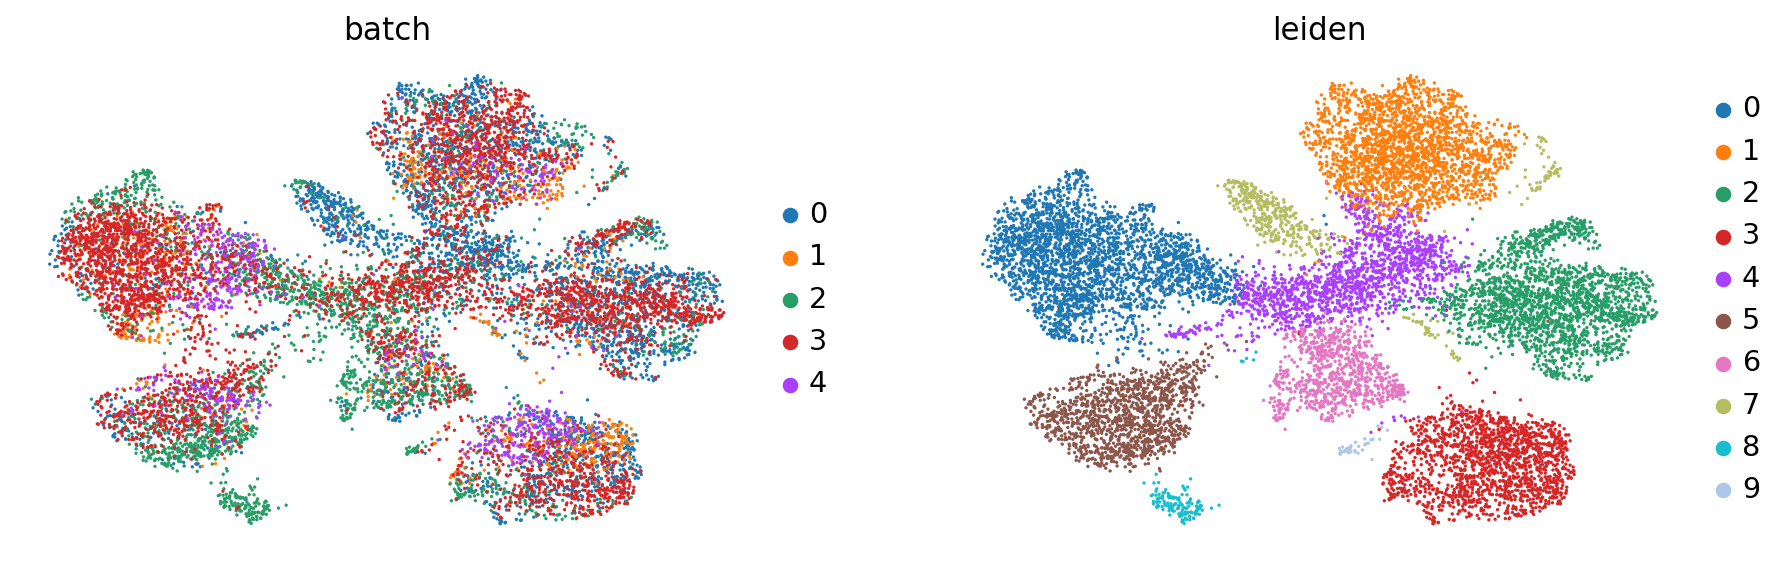

In [3]:
sc.pl.umap(
    adata,
    color=["batch", "leiden"],
    frameon=False,
)

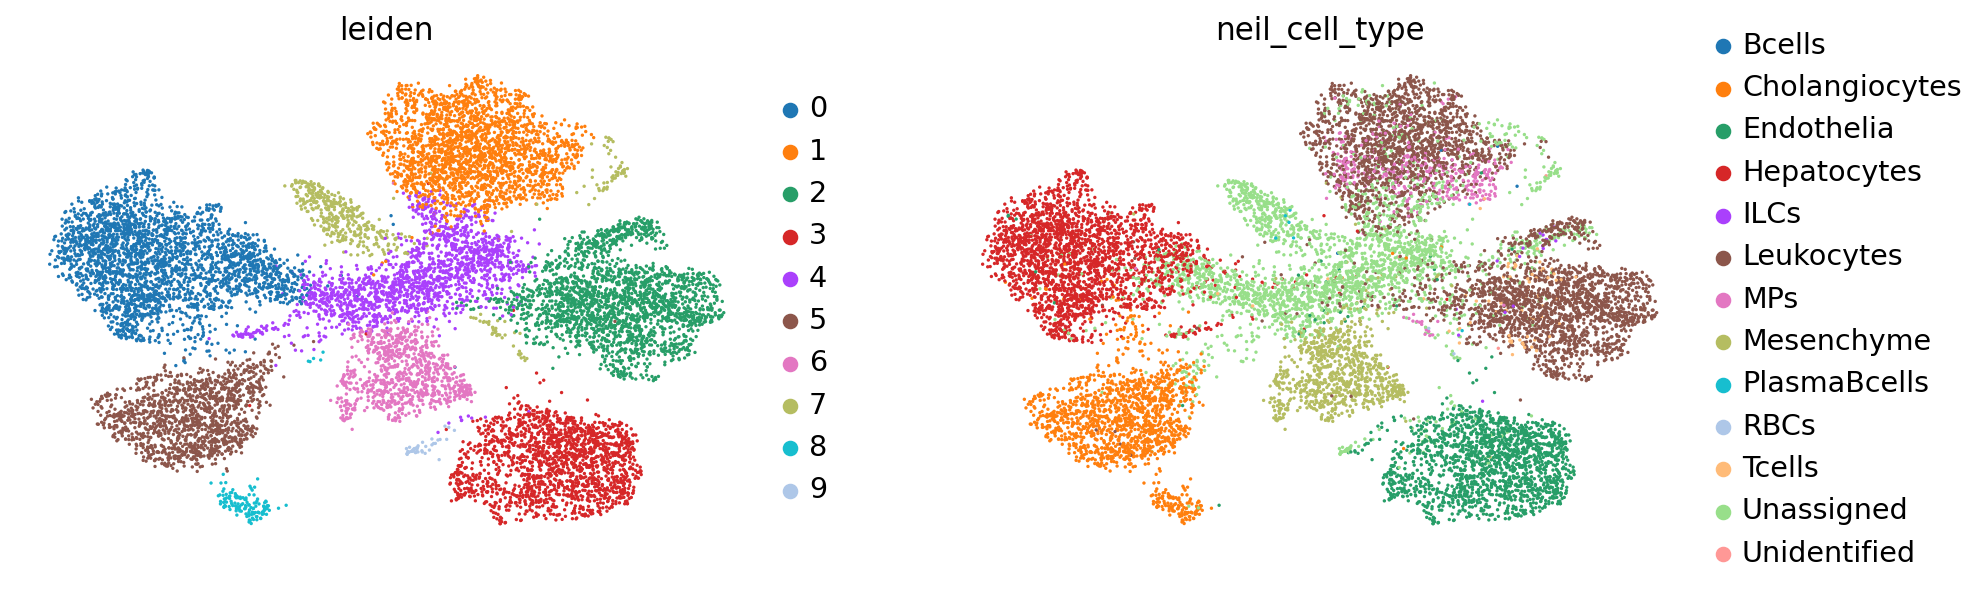

In [4]:
sc.pl.umap(
    adata,
    color=["leiden", "neil_cell_type"],
    frameon=False,
)

In [5]:
marker_genes = dict()
marker_genes['MPs'] = ['CD68','ITGAM','ITGAX','HLA-DRA','CSF1R','CD14']
marker_genes['pDC'] = ['LILRA4', 'CLEC4C', 'GZMB']
marker_genes['ILCs'] = ['KLRF1', 'KLRC1', 'GZMA', 'GZMB', 'NKG7']
marker_genes['Tcells'] = ['CD3D', 'CD3E', 'CD3G', 'CD8A']
marker_genes['Bcells'] = ['CD79A', 'CD79B', 'CD19', 'MS4A1']
marker_genes['PlasmaBcells'] = ['CD79A', 'IGHA2']
marker_genes['Mastcell'] = ['KIT', 'TPSAB1', 'TPSB2']
marker_genes['Endothelia'] = ['PECAM1', 'CDH5', 'ICAM2', 'KDR', 'ERG']
marker_genes['Mesenchyme'] = ['PDGFRB', 'ACTA2', 'COL1A1', 'COL1A2', 'COL3A1', 'DES', 'DCN']
marker_genes['Hepatocytes'] = ['ALB', 'TF', 'TTR', 'HNF4A','CYP2A6']
marker_genes['Cholangiocytes'] = ['EPCAM', 'KRT19', 'CD24']

In [6]:
sc.tl.rank_genes_groups(adata, method='wilcoxon', groupby='leiden')

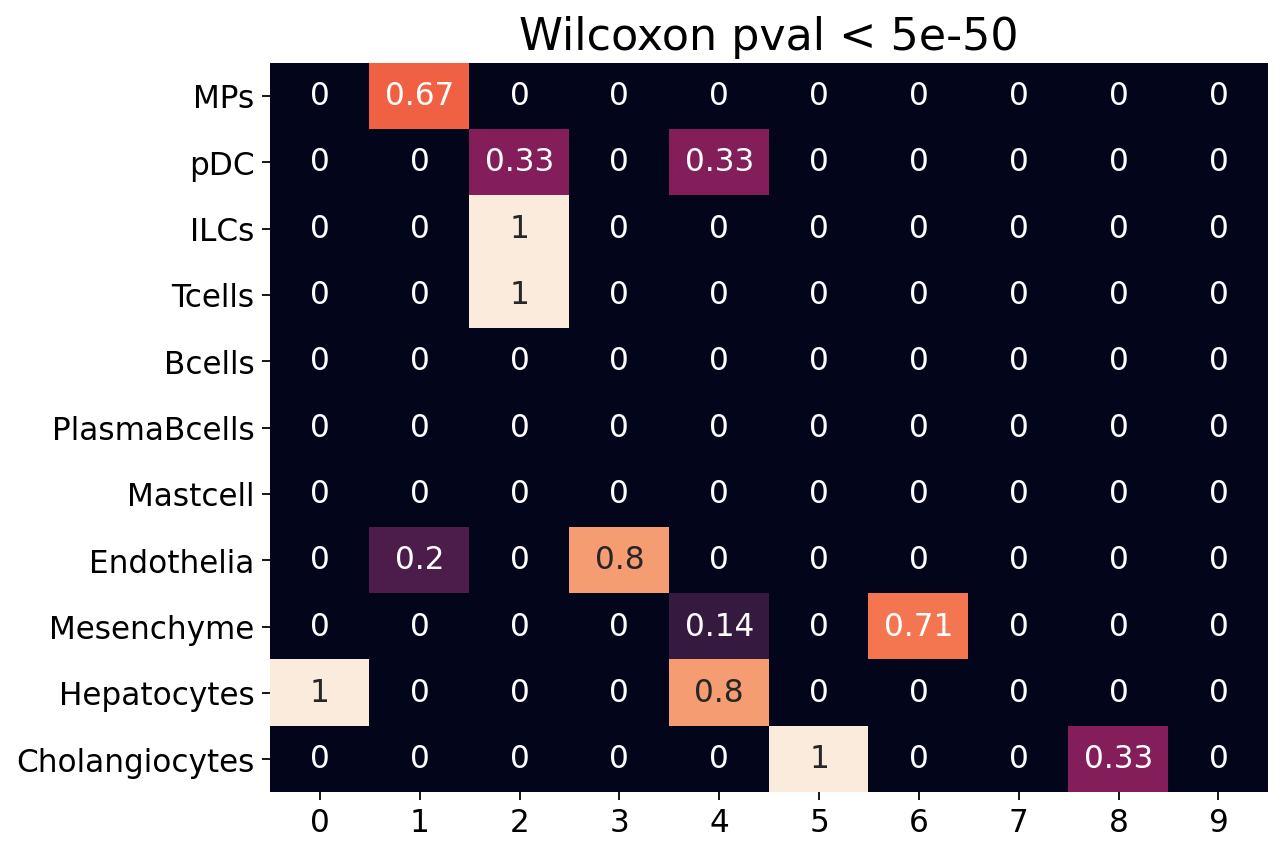

In [13]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.title('Wilcoxon pval < 5e-50', fontsize=20)
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_genes, 
                                                 normalize='reference', adj_pval_threshold=5e-50)
sns.heatmap(cell_annotation_norm, cbar=False, annot=True)
plt.show()

In [6]:
cc_genes = pd.read_table('data/Macosko_cell_cycle_genes.txt', delimiter='\t')
s_genes = list(cc_genes['S'].dropna())
g2m_genes = list(cc_genes['G2.M'].dropna())
sc.tl.score_genes_cell_cycle(adata, s_genes, g2m_genes)

/home/badi/anaconda3/envs/ml/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'phase' as categorical


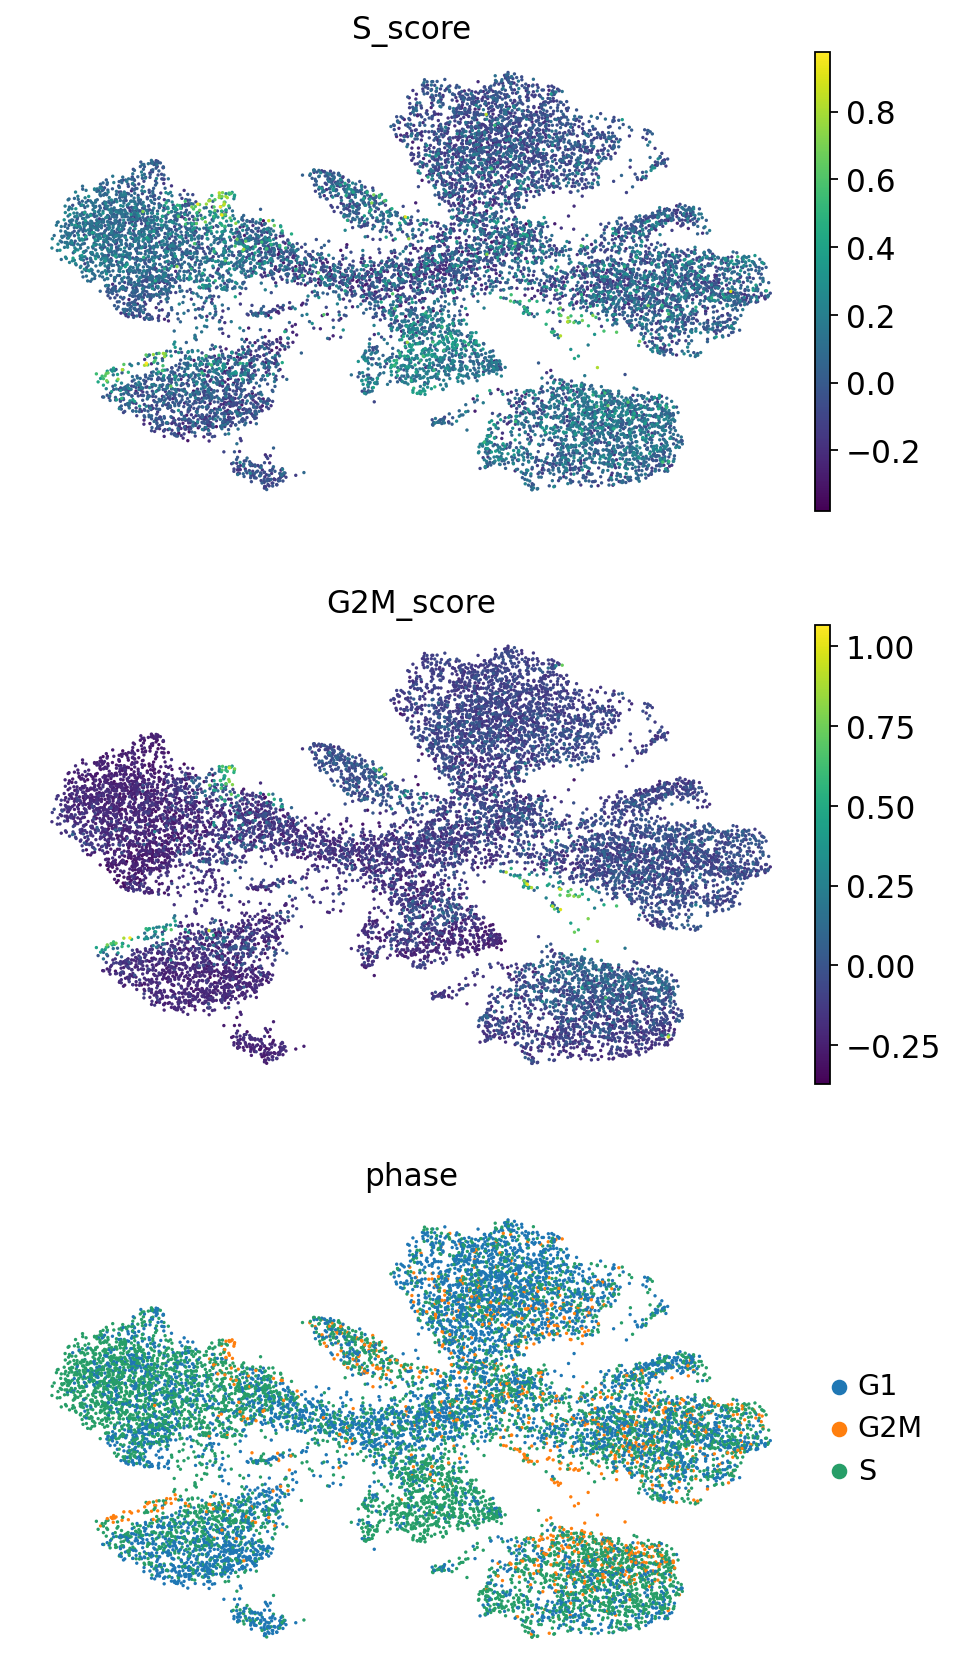

In [7]:
sc.pl.umap(adata, color=['S_score', 'G2M_score', 'phase'], frameon=False, ncols=1)

/home/badi/anaconda3/envs/ml/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


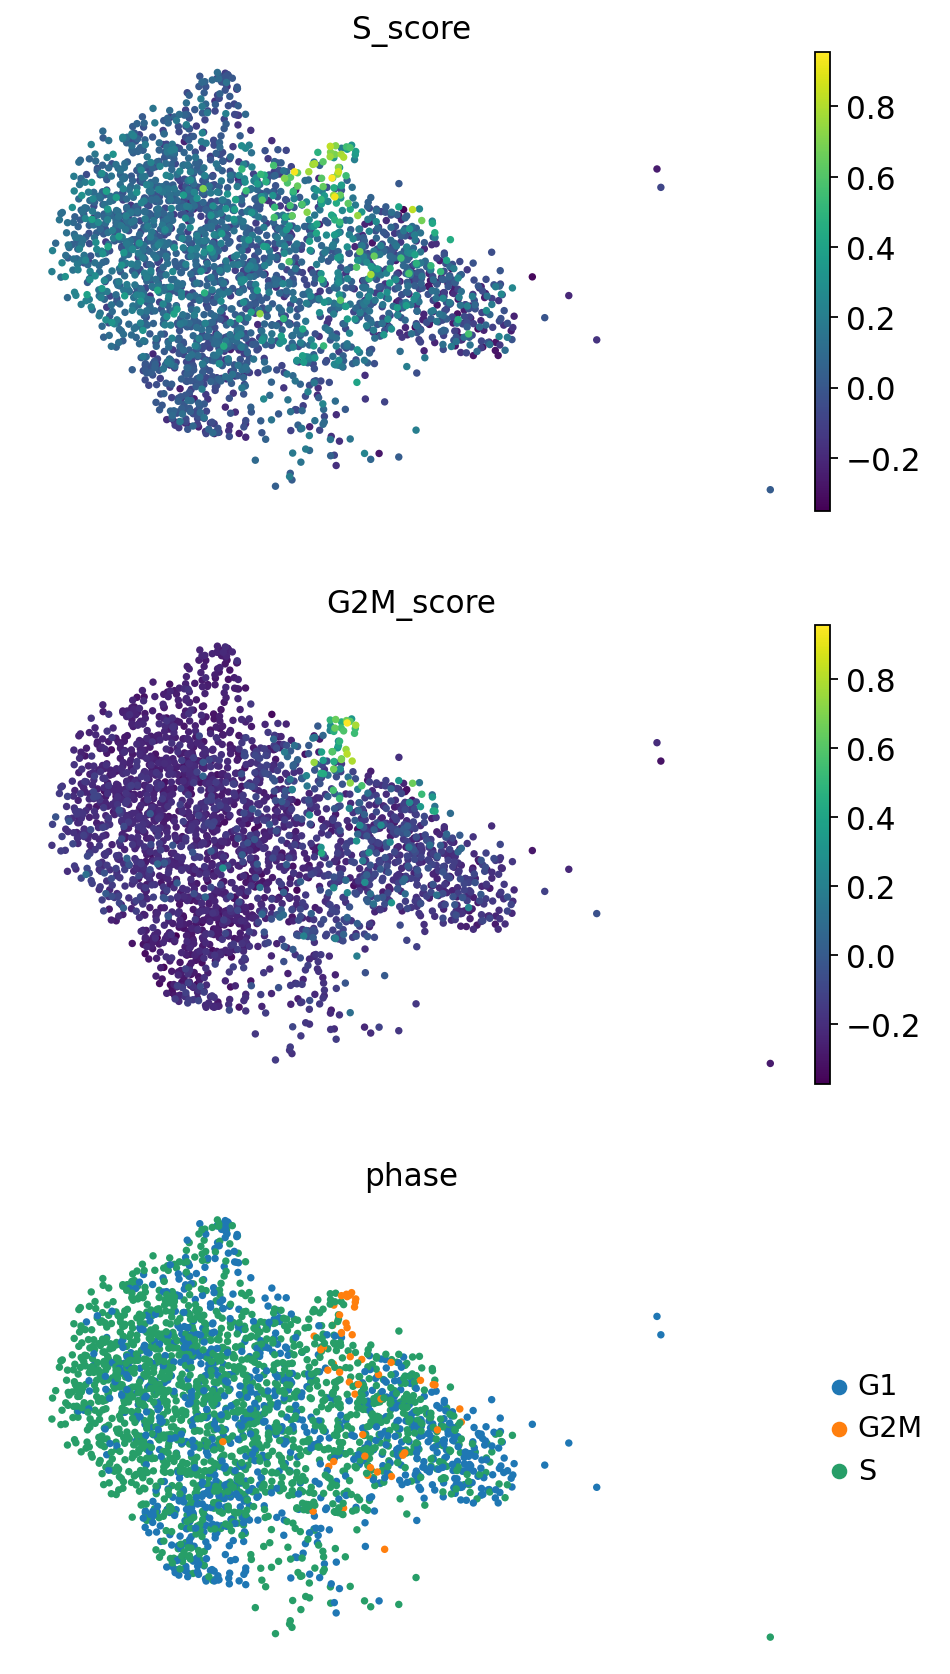

In [8]:
sc.pl.umap(adata[(adata.obs.leiden == '0')], color=['S_score', 'G2M_score', 'phase'],frameon=False, ncols=1)

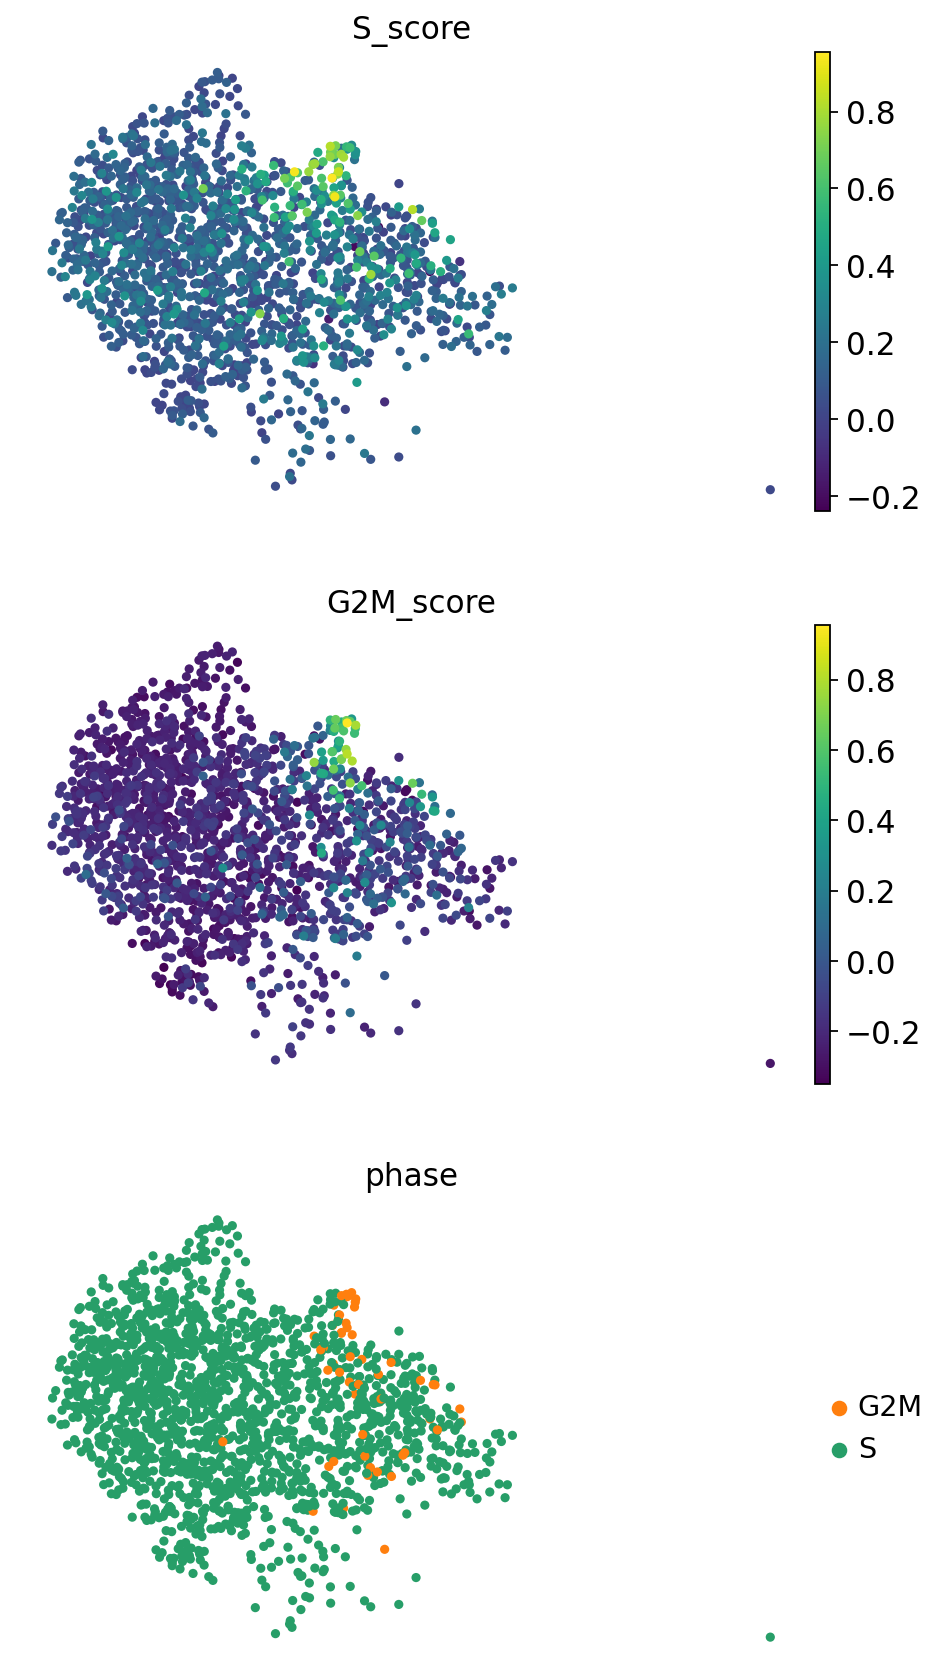

In [34]:
sc.pl.umap(adata[(adata.obs.leiden == '0') & ((adata.obs.phase == 'S') | (adata.obs.phase == 'G2M'))], color=['S_score', 'G2M_score', 'phase'],frameon=False, ncols=1)

In [9]:
adata.obs[(adata.obs.leiden == '0') & ((adata.obs.phase == 'S') | (adata.obs.phase == 'G2M'))]

,neil_cell_type,batch,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,leiden,S_score,G2M_score,phase
AACAAGACAAGAGTGC-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.176109,-0.199734,S
AACAGGGCATCCGAAT-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.037939,-0.182839,S
AACGTCACATTCATCT-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.041952,-0.138173,S
AAGGAATCATACCAGT-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.023642,-0.287892,S
AATGCCAAGCATTGAA-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.170898,0.114982,S
...,...,...,...,...,...,...,...,...,...,...
TTTACTGCAACTCCAA-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.000108,-0.084549,S
TTTAGTCAGATAACAC-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.383666,0.256328,S
TTTATGCTCCCGAATA-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.426034,0.726818,G2M
TTTCATGAGGGTCAAC-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.224702,-0.070746,S


In [40]:
len(adata.obs[(adata.obs.leiden == '0') & ((adata.obs.phase == 'G2M'))])

51

In [28]:
adata.obs[(adata.obs.leiden == '0') & (adata.obs.phase == 'G1')]

,neil_cell_type,batch,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,leiden,S_score,G2M_score,phase
AATTCCTCACTTCAAG-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,-0.001893,-0.153181,G1
ACCTGAACACACCTAA-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,-0.015366,-0.172857,G1
ACTTATCGTGCATCTA-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,-0.011705,-0.077852,G1
AGCGCTGTCATTCGGA-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,-0.074220,-0.223830,G1
AGGTCTACAGGACAGT-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,-0.055477,-0.112465,G1
...,...,...,...,...,...,...,...,...,...,...
TGATTCTTCCCATAGA-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,-0.065286,-0.071928,G1
TGTCCACCAGGTGAGT-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,-0.229320,-0.099658,G1
TTAGGCATCCTTGAAG-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,-0.035205,-0.196711,G1
TTCACCGGTGAGTGAC-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,-0.019578,-0.065906,G1


In [36]:
adata.obs[(adata.obs.leiden == '0')]

,neil_cell_type,batch,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,leiden,S_score,G2M_score,phase
AACAAGACAAGAGTGC-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.176109,-0.199734,S
AACAGGGCATCCGAAT-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.037939,-0.182839,S
AACGTCACATTCATCT-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.041952,-0.138173,S
AAGGAATCATACCAGT-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.023642,-0.287892,S
AATGCCAAGCATTGAA-1-0,Hepatocytes,0,0,0,5.648232,1.140234,0,0.170898,0.114982,S
...,...,...,...,...,...,...,...,...,...,...
TTTACTGCAACTCCAA-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.000108,-0.084549,S
TTTAGTCAGATAACAC-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.383666,0.256328,S
TTTATGCTCCCGAATA-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.426034,0.726818,G2M
TTTCATGAGGGTCAAC-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.224702,-0.070746,S


In [41]:
adata.obs[adata.obs.phase == 'S']

,neil_cell_type,batch,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,leiden,S_score,G2M_score,phase
AAACCCAGTCTCGACG-1-0,Unassigned,0,0,0,5.648232,1.140234,2,0.170352,-0.041587,S
AAACCCATCAGACCCG-1-0,Unassigned,0,0,0,5.648232,1.140234,7,0.062184,-0.060128,S
AAACGAACACAACATC-1-0,Leukocytes,0,0,0,5.648232,1.140234,1,0.152752,-0.147772,S
AAACGAACACACACGC-1-0,Mesenchyme,0,0,0,5.648232,1.140234,6,0.360746,-0.177822,S
AAACGAAGTTATGGTC-1-0,Unassigned,0,0,0,5.648232,1.140234,7,0.342248,-0.069937,S
...,...,...,...,...,...,...,...,...,...,...
TTTAGTCCATCCTTCG-1-4,Mesenchyme,4,4,0,5.553314,0.768050,6,0.135247,-0.117174,S
TTTCATGAGGGTCAAC-1-4,Hepatocytes,4,4,0,5.553314,0.768050,0,0.224702,-0.070746,S
TTTCCTCTCATCACAG-1-4,Endothelia,4,4,0,5.553314,0.768050,3,0.142669,0.066751,S
TTTCGATGTGCATGTT-1-4,Endothelia,4,4,0,5.553314,0.768050,3,0.498076,0.280880,S


In [16]:
adata.X.data[0]

2.4369774